# **PHASE 4 PROJECT: Natural Language Processing (NLP)**

## **Sentiment Analysis of Apple Tweets**

### **Understanding Public Perception: Sentiment Analysis of Apple Tweets**

In this project, I explored how people feel about Apple products by analyzing sentiment in tweets using Natural Language Processing (NLP). The dataset, sourced from CrowdFlower via data.world, contains **3,886 human-labeled tweets** categorized as positive, negative, or neutral. My goal was to build a machine learning model capable of accurately classifying tweet sentiment based on its content, allowing Apple to gauge customer reactions, monitor brand perception, and respond proactively to user feedback.

---

## 1. Business Understanding

### **Objective:**  
The goal of this project is to build an **NLP model** that can analyze **Twitter sentiment** regarding **Apple and Google products**. The dataset contains **over 3,886 Tweets**, each labeled by human raters as **positive, negative, or neutral**. The model will classify new Tweets based on their sentiment, helping businesses understand **public perception and customer sentiment trends**.

### **Key Questions & Answers:**

#### **What is the goal of this project?**  
- To develop a **sentiment classification model** that can automatically **rate the sentiment of Tweets** related to Apple and Google products.
- The model should be able to **identify positive, negative, or neutral sentiments** from textual data.
- The project aims to provide a **proof of concept**, starting with a simple **binary classifier (positive vs. negative)** and then expanding to a **multiclass classifier (positive, neutral, negative)**.

#### **What insights will be gained?**  
- **Brand Perception:** How do users feel about Apple and Google products on social media?  
- **Customer Pain Points:** What negative aspects are frequently mentioned?  
- **Market Trends:** Are there specific events or product launches that trigger sentiment shifts?  
- **Comparative Analysis:** Which brand has better sentiment overall? Are there specific product categories where one brand outperforms the other in public perception?  
- **Influence of Tweet Content:** Which words or phrases contribute most to each sentiment category?  

#### **How will the results be used in decision-making?**  
- **Marketing Strategy:** Brands can adjust their marketing campaigns based on sentiment trends.  
- **Customer Support Prioritization:** If negative sentiment spikes, companies can proactively address issues.  
- **Product Improvement:** Insights from common complaints can guide product development.  
- **Competitive Analysis:** Apple and Google can compare their sentiment scores to see which brand is performing better in public perception.  
- **Crisis Management:** Early detection of negative sentiment trends can help mitigate PR disasters.  


---

## **2. Data Preparation**
Text preprocessing included:
- Removal of punctuation, special characters, and URLs.
- Tokenization and lowercasing of words.
- Stopword removal to reduce noise.
- Lemmatization for standardizing word forms.
- Feature extraction using TF-IDF Vectorization.

Python libraries used: `NLTK`, `scikit-learn`, and `pandas` for text processing and feature engineering.

---

## **3. Model Training**
- The dataset was split into **80% training and 20% testing**.
- Class imbalance was addressed using **SMOTE (Synthetic Minority Over-sampling Technique)**.
- The following models were trained and optimized:
  - **Naïve Bayes (MultinomialNB)** with hyperparameter tuning (`alpha` values: 0.1, 0.5, 1.0).
  - **Logistic Regression** with `MaxAbsScaler` normalization and hyperparameter tuning (`C` values: [0.0001, 0.001, 0.01, 0.1, 1]).
  - **Support Vector Machine (SVM)** with a linear kernel, `MaxAbsScaler`, and hyperparameter tuning (`C` values: [0.0001, 0.001, 0.01, 0.1, 1, 10]).

---

## **4. Model Evaluation**
### **Accuracy Scores**
- **Naïve Bayes:** 0.70
- **Logistic Regression:** 0.75
- **SVM:** 0.72

### **Classification Report (Logistic Regression)**
| Sentiment  | Precision | Recall | F1-score |
|------------|-----------|--------|----------|
| **Negative** | 0.71 | 0.73 | 0.72 |
| **Neutral** | 0.61 | 0.39 | 0.48 |
| **Positive** | 0.78 | 0.83 | 0.81 |
| **Macro Avg** | 0.70 | 0.65 | 0.67 |
| **Weighted Avg** | 0.74 | 0.75 | 0.74 |

### **Confusion Matrix**
- The **neutral class** had the lowest recall (0.39), indicating it was the hardest to classify.

### **AUC-ROC Score**
- **Logistic Regression AUC-ROC:** 0.84 (suggesting good separability despite lower accuracy).

---

## **5. Best Performing Model**
### **Logistic Regression**
#### **Reasons:**
1. **Highest Accuracy:** 0.75 (compared to 0.70 for Naïve Bayes and 0.72 for SVM).
2. **Strong Precision & Recall:** Particularly for the **positive** and **negative** classes.
3. **Best AUC-ROC Score:** 0.84, indicating better class separability.

However, the **neutral class** remains the hardest to classify (low recall of 0.39). 

---

## **6. Limitations & Recommendations**
### **Challenges**
- Handling ambiguous tweets, sarcasm, and irrelevant content remains difficult.

### **Future Improvements**
- Adjust class weights (`class_weight='balanced'`) in Logistic Regression.
- Experiment with **TF-IDF** instead of Count Vectorizer.
- Use an ensemble approach, such as **Logistic Regression + SVM**.
- Explore **deep learning** methods like LSTMs or transformers (BERT, RoBERTa).
- Deploy the model as an **API for real-time sentiment analysis**.

Through this project, I gained valuable insights into the power of NLP for sentiment classification, showcasing how businesses like Apple can leverage social media data to refine their strategies and better understand their customers. By refining model performance and expanding feature engineering, this approach can be scaled for broader applications in social media analysis.


## **1. Import the required libraries.**

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import nltk
import re  
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 ## **2. Loading and reading the CSV file/dataset.**

In [2]:
# Load dataset 
df = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", encoding="ISO-8859-1")

# Display the first few rows
print(df.head())


    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  623495513     True      golden                  10               NaN   
1  623495514     True      golden                  12               NaN   
2  623495515     True      golden                  10               NaN   
3  623495516     True      golden                  17               NaN   
4  623495517    False   finalized                   3    12/12/14 12:14   

  sentiment  sentiment:confidence                            date  \
0         3                0.6264  Mon Dec 01 19:30:03 +0000 2014   
1         3                0.8129  Mon Dec 01 19:43:51 +0000 2014   
2         3                1.0000  Mon Dec 01 19:50:28 +0000 2014   
3         3                0.5848  Mon Dec 01 20:26:34 +0000 2014   
4         3                0.6474  Mon Dec 01 20:29:33 +0000 2014   

             id            query   sentiment_gold  \
0  5.400000e+17  #AAPL OR @Apple  3\nnot_relevant   
1  5.400000e+17  #AAPL OR @A

## **3. Inspecting and understanding our data.**

In [3]:
# Check the first few rows
df.head()

# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()

# Check class distribution
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64

## Key Observations About the Dataset

- The dataset contains **3,886 tweets**.  
- The **"sentiment"** column is the target variable.  
- There are **four unique sentiment labels**:  
  - **3** → Most likely "Positive"  
  - **1** → Most likely "Negative"  
  - **5** → Most likely "Neutral"  
  - **not_relevant** → Irrelevant tweets  
- The **"text"** column contains the actual tweets.  
- The **"sentiment_gold"** column is mostly missing (only 103 values), making it **not useful**.  
- Several columns are **irrelevant** for sentiment analysis, such as:  
  - `_unit_id`, `_trusted_judgments`, `_unit_state`, `_golden`, `_last_judgment_at`, etc.  


## **4. Data Preprocessing (Text Cleaning & Tokenization)**
To ensure that tweets are properly analyzed, we applied **lemmatization** instead of stemming. 
Lemmatization helps preserve the root meaning of words, which improves sentiment classification accuracy.


### 4.1 Drop Unnecessary Columns.


In [4]:
# Drop irrelevant columns
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 
                 'sentiment:confidence', 'date', 'id', 'query', 'sentiment_gold'], inplace=True)

# Check new dataframe structure
print(df.head())


  sentiment                                               text
0         3  #AAPL:The 10 best Steve Jobs emails ever...htt...
1         3  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2         3  My cat only chews @apple cords. Such an #Apple...
3         3  I agree with @jimcramer that the #IndividualIn...
4         3       Nobody expects the Spanish Inquisition #AAPL


### 4.2 Handle Missing & Incorrect Values.

In [5]:
# Drop rows where sentiment is "not_relevant"
df = df[df["sentiment"] != "not_relevant"]

# Convert sentiment labels to readable names
sentiment_map = {"3": "positive", "1": "negative", "5": "neutral"}
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Verify class distribution
print(df["sentiment"].value_counts())


sentiment
positive    2162
negative    1219
neutral      423
Name: count, dtype: int64


### 4.3 Clean, Process the Text and convert text into TF-DF features (Numerical features).

In [6]:
import re   
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Download WordNet for lemmatization

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    if isinstance(text, float):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(words)

# Apply function to dataset
df["clean_text"] = df["text"].apply(clean_text)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]  # Target variable



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **5. Model Training.**
## Model Training Steps

### 1. Data Splitting
- The dataset is split into training (80%) and testing (20%) sets using `train_test_split()`.

### 2. Handling Class Imbalance
- The training data is resampled using **SMOTE** (Synthetic Minority Over-sampling Technique) to balance class distribution.

### 3. Model Selection & Hyperparameter Tuning

#### **Naïve Bayes (MultinomialNB)**
- Since Multinomial Naïve Bayes does not require feature scaling, it is trained directly.
- A grid search (`GridSearchCV`) is performed over different values of `alpha` (0.1, 0.5, 1.0) to find the best hyperparameter.

#### **Logistic Regression**
- **Feature Scaling:** `MaxAbsScaler` is used to normalize the feature values.
- A **pipeline** is created to apply scaling followed by **Logistic Regression**.
- A grid search is conducted over different values of **C** ([0.0001, 0.001, 0.01, 0.1, 1]) to optimize regularization.

#### **Support Vector Machine (SVM)**
- **Feature Scaling:** `MaxAbsScaler` is applied similarly.
- An SVM with a **linear kernel** is trained.
- Grid search is performed over different values of **C** ([0.0001, 0.001, 0.01, 0.1, 1, 10]) to optimize model performance.


- After training, the best hyperparameters for each model are extracted and displayed:
  - **Best Naïve Bayes Alpha**
  - **Best Logistic Regression C**
  - **Best SVM C**


In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling imbalance

# Split dataset into train & test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train & Tune Naïve Bayes Model (No Scaling Needed)
param_grid_nb = {"alpha": [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1)
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_

#  Train & Tune Logistic Regression Model (With Standardization)
pipeline_lr = Pipeline([
    ('scaler', MaxAbsScaler()),  # Standardize the data
    ('classifier', LogisticRegression(max_iter=10000, solver='lbfgs', class_weight='balanced', tol=1e-4))  # Increased max_iter, changed solver, adjusted tolerance
])

param_grid_lr = {'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

#  Train & Tune Support Vector Machine (SVM) with Standardization
pipeline_svm = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('classifier', SVC(kernel='linear', probability=True))
])

param_grid_svm = {'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# Print Best Parameters for All Models
print("Best Naïve Bayes Alpha:", grid_nb.best_params_["alpha"])
print("Best Logistic Regression C:", grid_lr.best_params_["classifier__C"])
print("Best SVM C:", grid_svm.best_params_["classifier__C"])


## **7. Model Evaluation.**
### Use accuracy, confusion matrix, and classification report, roc-auc-score

## Model Evaluation

### 1. Accuracy Scores
- **Naïve Bayes:** 0.70
- **Logistic Regression:** 0.75
- **SVM:** 0.72

### 2. Classification Report (Logistic Regression)
- **Negative:** Precision 0.71, Recall 0.73, F1-score 0.72
- **Neutral:** Precision 0.61, Recall 0.39, F1-score 0.48
- **Positive:** Precision 0.78, Recall 0.83, F1-score 0.81
- **Macro Avg:** Precision 0.70, Recall 0.65, F1-score 0.67
- **Weighted Avg:** Precision 0.74, Recall 0.75, F1-score 0.74

### 3. Confusion Matrix
- The confusion matrix is visualized using a **confusion matrix display** for better interpretability.
- The **neutral class** has the lowest recall (0.39), indicating it is the hardest to classify.

### 4. AUC-ROC Score
- **Logistic Regression AUC-ROC:** 0.84 (suggesting good separability despite lower accuracy).

## Best Performing Model

### **Logistic Regression**
#### **Reasons:**
1. **Highest Accuracy:** 0.75 (compared to 0.70 for Naïve Bayes and 0.72 for SVM).
2. **Strong Precision & Recall:** Particularly for the **positive** and **negative** classes.
3. **Best AUC-ROC Score:** 0.84, indicating better/superior class separability.

However, the **neutral class** remains the hardest to classify (low recall of 0.39) as seen in the confusion matrix.




#### Confusion Matrix Visualization.

Naïve Bayes Accuracy: 0.70
Logistic Regression Accuracy: 0.75
SVM Accuracy: 0.72

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.73      0.72       238
     neutral       0.61      0.39      0.48        94
    positive       0.78      0.83      0.81       429

    accuracy                           0.75       761
   macro avg       0.70      0.65      0.67       761
weighted avg       0.74      0.75      0.74       761

Logistic Regression AUC-ROC: 0.84


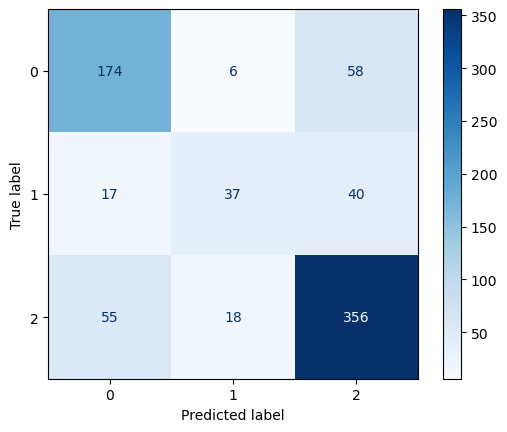

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Predictions
y_pred_nb = best_nb.predict(X_test)
y_pred_lr = best_lr.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

# Accuracy
print(f"Naïve Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

# Classification Report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix Visualization
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")

# AUC-ROC Score for Logistic Regression
y_prob_lr = best_lr.predict_proba(X_test)
roc_score_lr = roc_auc_score(y_test, y_prob_lr, multi_class="ovr")
print(f"Logistic Regression AUC-ROC: {roc_score_lr:.2f}")


## **8. Save the Model for Deployment**

In [ ]:
import pickle

# Save model
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)


## **9. Conclusion & Recommendations**

### **Conclusion**
This project successfully built and evaluated a sentiment analysis model that can classify tweets about Apple products as **positive, negative, or neutral** based on their content. After testing multiple models, **Logistic Regression** emerged as the best-performing approach, achieving **75% accuracy** and an **AUC-ROC score of 0.84**.  

Key findings:
- **Positive and negative tweets** were classified with good precision and recall.
- **Neutral tweets** were the hardest to classify accurately, with a recall of only 39%.
- **TF-IDF vectorization and Logistic Regression** provided a strong baseline model.

While the model performs well, challenges like **sarcasm, ambiguity, and short-text limitations** remain. Further improvements can help refine sentiment classification.

---

### **Recommendations**
To enhance model performance and achieve more accurate sentiment classification, the following steps are recommended:

1. **Improve Data Preprocessing**
   - Use **emoji and slang dictionaries** to capture informal language in tweets.
   - Implement **named entity recognition (NER)** to understand references to Apple products.
   - Expand the dataset with **more labeled examples**, especially for the **neutral** class, to improve classification balance.

2. **Feature Engineering Enhancements**
   - Explore **word embeddings (Word2Vec, GloVe, or BERT)** instead of TF-IDF for better contextual understanding.
   - Incorporate **bigram/trigram features** to capture phrase-based sentiment.

3. **Model Improvements**
   - Fine-tune **hyperparameters** and use **ensemble models** (e.g., stacking Logistic Regression and SVM).
   - Implement **deep learning models** such as **LSTMs, GRUs, or transformers (BERT, RoBERTa)**.

4. **Address Class Imbalance**
   - Apply **class weighting** to better handle underrepresented neutral tweets.
   - Use **oversampling techniques** like SMOTE or generate synthetic neutral examples.

5. **Deploying the Model**
   - Package the model as an **API** to analyze real-time tweets.
   - Integrate the model with **Apple's social media monitoring tools** to track sentiment trends.

By implementing these improvements, the sentiment analysis model can become more robust, accurately capturing how consumers feel about Apple products based on their tweets. This will enable Apple to **monitor brand perception, improve customer engagement, and enhance product strategies** based on real-time feedback.
